# Algorithmic Techniques & Foundations Lab

## Linear Regression

This lab notebook is designed to review and compare approaches to linear regression, with an explanation of the mathematical foundation.

This lab will be useful for beginner and intermediate learners who are looking for a deeper understanding of the mathematical and statistical frameworks of commonly used Python machine learning techniques.

This lab was initially developed at Arkansas State University by Dr. Jonathan Stubblefield and expanded by Jennifer Fowler (https://github.com/jennifer-fowler).

*Note:* If you are not familiar with Colab or Jupyter Notebooks, we recommended that you participate in a Colab or Jupyter Notebook tutorial to understand how to use the environment. This notebook does not have guidance on the basic operation of the environment.

* Video overview of Google Colab: https://youtu.be/NUJMprxho5o

* Colab tutorial: https://colab.research.google.com/notebooks/basic_features_overview.ipynb 

* Jupyter Notebook Beginner's Guide: https://www.dataquest.io/blog/jupyter-notebook-tutorial/ 


Legend:

📌 This symbol is used to describe the Exercises you'll be completing.

⏸ This symbol is for Detours, supplemental info in case you want it.

🏀 This symbol means it's your turn to play ball and type some code.

🦞 This symbol is used to explain the mathematical concepts related to the exercise.

In [1]:
# only run this cell IF you're working in Colab AND the import cell below doesn't work
# The colab environment comes with some commonly used python packages already installed
# but we are using a couple that are typically not installed
# you will probably have to execute this cell every time you connect to a new colab server
!pip install numdifftools scipy 

#if you're running this as a Jupyter notebook or .py file in a desktop IDE, you may need 
#to install the packages referenced below with pip in your terminal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 KB 2.3 MB/s eta 0:00:00


In [2]:
# import all the packages and modules needed for this lab
import matplotlib 
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import pearsonr
import numpy as np
from numdifftools import Gradient
from numpy import random
import sklearn
from sklearn import datasets
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

For this lab, we are going to use the sklearn california_housing dataset. This dataset is available publicly through ScikitLearn, a robust and popular library of Python machine learning packages. (https://scikit-learn.org/stable/)

-> Check the references cell at the end of this notebook for useful links to the stuff we cover in this lab. 

First, we will import and look at a dataset. Then we will compare various linear regression techniques to explore the relationship of some variables in the data.

## 📌 Exercise: Linear Regression --------------------------------------

1. Using sklearn, fetch the California Housing dataset
2. Using only numpy and scipy functions, calculate a linear regression line for one of the independent variables or features to predict the target.
3. Create a scatterplot with your selected predictor and draw the regression line
4. Calculate and print the R^2 score
5. Use sklearn LinearRegression on the same predictor and target, then compare the results.


The cell below will return a summary of the dataset and metadata. We will look through it to pick a predictor and find the column name of the target/response or y.

In [3]:
# now let's fetch the dataset from sklearn and assign it to a variable
# link in references cell at the end of this notebook
# this command will fetch, or retrieve, the dataset and store it in the assigned spot

house = sklearn.datasets.fetch_california_housing(as_frame=True)

### ⏸ Detour: Fetching Data from ScikitLearn
(link in references cell at the end of this notebook) 


Scikitlearn offers a repository of public datasets that can be used in notebooks and projects like this one. Each dataset comes with metadata and a variety of attributes that can be explored in Python. The metadata outlines which variables are targets/responses/dependent and which are features/predictors/independent. The metadata has some other information about the dataset, like data type (dtype) and size.

This sklearn dataset has the following attributes:
* **data** (ndarray)
Each row corresponding to the feature values in order. If as_frame is True, data is a pandas object.
* **target** (numpy array)
This is the response/y/dependent variable. If as_frame is True, target is a pandas object.
* **feature_names** (list)
An array of ordered feature names used in the dataset.

Attributes can be used in code with this syntax: dataframe.attribute

### Task: Identify the x and y variables 

In [5]:
# let's print the name and information about the target variable
print(house.target)

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64


🏀       NOW IT'S YOUR TURN:

In [6]:
# take a quick look at the first few rows of the dataset
# using the pandas .head() function
# first we will need to convert it to a pandas dataframe, so we will reassign it
# with an additional command - ['frame'] will convert the dataset to a pandas dataframe

# Type the fetch command, with the additional parameter described above

house = sklearn.datasets.fetch_california_housing(as_frame=True)['frame']

# Now type a print command to look at the header of the data

print(house.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  



To me, the two features with values that look like they might correspond to the target are 'MedInc' and 'HouseAge'. The values of those columns look like they might follow a similar pattern to 'MedHouseVal'. In the notebook we will proceed with 'MedInc' as the predictor/x/independent variable. You can choose a different option, just be sure to type the correct variable name in the rest of your code.

In [7]:
# now we will assign our x and y values
hy = house['MedHouseVal']
hx = house['MedInc']

### Task: Create a simple first plot

A good first step in any data science project is visual exploratory analysis. This just means to take a look at it, either by printing some of the data table itself, or exploring simple visualizations.

In this next task, we will use matplotlib to generate a simple scatter plot and get a glance at the two variables selected in the dataset. 

The standard matplotlib plot function is plot(x,y), you can include additional parameters or arguments to change the plot style, plotting symbol, and colors. Check the references for a link to the Matplotlib style guide. 

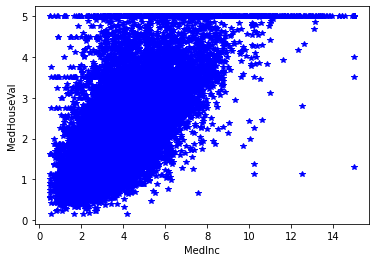

In [8]:
# let's make a simple scatter plot to see 
# what the relationship between our x and y looks like
# the standard formula is plot(x,y)

plt.plot(hx,hy, 'b*') #the b* here means blue star

# matplotlib has a whole style guide in the documentation online
# link in references cell at the end of this notebook

# we will label the axes
plt.ylabel('MedHouseVal')
plt.xlabel('MedInc')

# then we have to tell it to show the plot
plt.show()

There are several ways you can perform a linear regression in Python. The next part of the exercise will walk through three methods:
1. Conducting it manually with basic scipy functions like standard deviation - std() , mean(), and pearsonr() 
2. Using the scipy.stats linregress() algorithm
3. Using the sklearn LinearRegression() algorithm

Then we will compare the accuracy of each method.

### 🦞 The Math
The basic algebraic formula for a line is y=mx + b, where m is the slope and b is the intercept.

In this example we are going to reword that as y = Bx + A, where B is equal to the correlation coefficient of x and y (a number, in this case the pearsonr coefficient), multiplied by the standard deviation of y / standard deviation of x. 

A is equal to the mean of y minus the product of B and the mean of x.

We can write those algebraically with the appropriate scipy functions like this:

B = pearsonr(x,y) * std(y)/std(x)

A = mean(y) - B*mean(x)

The Pearson correlation coefficient measures the linear relationship between two datasets. A value of 0 means there is no correlation, while values approaching 1 indicate a strong, positive correlation. Values approaching -1 indicate a strong, negative correlation.

For more info on the Pearson correlation coefficient and pearsonr() function, check the references cell at the end of this notebook.


Now let's try it out.

In [9]:
# we will use scipy.stats.pearsonr() 
# to calculate and assign the correlation coefficient for our selected x and the target
scipy.stats.pearsonr(hx, hy)
# the function will return a tuple with the pearson correlation coefficient and the p-value


PearsonRResult(statistic=0.6880752079585478, pvalue=0.0)

### Bonus Questions
* What is a tuple and how is it different from a list?

* According to the pearsonr() docs linked above, what does the output we just got tell us?

* What does a correlation coefficient of ~0.68 indicate? 

* What does a p-value of 0.0 indicate?

In [10]:
# let's copy and paste the first value above- the correlation coefficient- and assign it
cc= 0.6880752079585478

# then we can use the lines below to calculate and assign the standard deviations and means
sdx = np.std(hx)
sdy = np.std(hy)
my = np.mean(hy)
mx = np.mean(hx)

In [11]:
# now we can calculate B
B = cc * (sdy/sdx)
B

0.41793849201896244

In [12]:
# now we can calculate A
A = my - (B*mx)
A

0.45085576703268027

## Plotting the Regression Line
To plot the regression line, we will give pyplot two end points in this order: ([x1, x2], [y1, y2])

The line will look best if it begins on the y-axis and ends near the highest x value where the data ends (in this case, it looks like 14 or 15).

So for the first endpoint (x1, y1) we will use x = 0, where the line intercepts the y-axis. For the second endpoint (x2, y2) we will use x = 14.

To find y2, we will have to plug the selected x2 and the calculated A and B values into the line formula y = Bx + A

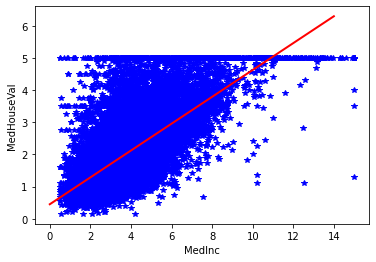

In [13]:
# first we will assign the values we know- x1, x2, and y1.
x1 = 0
x2 = 14
y1 = 0.45085576703268027
# let's plug those values in and find y2 with y = Bx +A
y2 = (0.41793849201896244) * 14 + 0.45085576703268027

# now we can recreate the plot and add the regression line
plt.plot(hx, hy, 'b*')
plt.ylabel('MedHouseVal')
plt.xlabel('MedInc')
plt.plot([x1, x2], [y1, y2], color = 'r', linewidth=2)
plt.show()



---


## Algorithmic regression with scipy linregress
Congrats! You just performed a manual linear regression. Now let's try scipy's built-in linear regression algorithm, linregress().

The function requires an (x, y) argument and will return five values- the slope (B), the intercept (A), the R^2 score, the p-value, and the standard error. 

In [14]:
# we can assign the resulting values and print them 
BP, AP, r_value, p_value, std_err = scipy.stats.linregress(hx, hy)
print("B' = ", BP)
print("A' = ", AP)
print("r^2 = ", r_value)

B' =  0.4179384920189624
A' =  0.4508557670326805
r^2 =  0.6880752079585476


###How do the results compare? 
* Are the values similar or the same?

* Reminder- what does an r-squared score of ~0.68 indicate?


---


## LinearRegression with sklearn
Now let's test the native machine learning model for linear regression in scikitlearn- LinearRegression. 

The base function does not require any arguments- though it does accept several- and can be directly fitted to the data using .fit(x, y).

This function does require the data format to be numpy arrays, so we will have to manipulate the x we used above to get it in the proper format and shape for LinearRegression.

After fitting the model, we can directly print the calculated values for B, A, and accuracy or r-squared score.

In [15]:
# we have to convert our hx variable into a numpy array
x = np.array(hx)

# then re-shape it into a 1D array for the LinearRegression to work
x = x.reshape(-1,1)

# next we assign and fit the regression model to our new x and the original target variable hy
reg = LinearRegression().fit(x, hy)

# and print the results
print(reg.score(x, hy))
print(reg.intercept_)
print(reg.coef_)

0.47344749180719903
0.45085576703267893
[0.41793849]


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


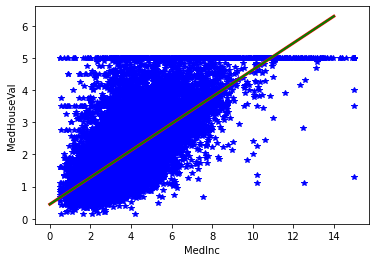

In [16]:
# let's make another plot to overlay the two regression lines and compare them visually
# the x1 and x2 values will be the same for both lines
# we will reuse the y2 value from the scipy method and calculate a new endpoint for the sklearn method
x1 = 0
x2 = 14
y1 = 0.45085576703268027 #the intercept value from the scipy method
y2 = (0.41793849201896244) * 14 + 0.45085576703268027 # y = Bx + A 

y3 = reg.intercept_ #the intercept value from the sklearn method
y4 = (reg.coef_) * 14 + reg.intercept_ # y = Bx + A


plt.plot(hx, hy, 'b*')
plt.ylabel('MedHouseVal')
plt.xlabel('MedInc')
plt.plot([x1, x2], [y1, y2], color = 'r', linewidth=3)
plt.plot([x1, x2], [y3, y4], color = 'g', linewidth=2)
plt.show()

## How do the results compare?

## Bonus question:

* What are two major drawbacks of linear regression?

## 📌 NEXT TIME: Multiple Regression + Stochastic Gradient Descent ---------------------

Multiple regression addresses the shortcomings of linear regression by allowing for multiple independent values, or predictors. Now there are more coefficients to calculate, one for the relationship between the target or response and each predictor. One way to do this with an optimization algorithm- a stochastic gradient descent. We can understand the term by breaking down its components- stochastic means random, gradient refers to derivatives, and descent meaning going downward. 


#References and Other Resources


* matplotlib pyplot: https://matplotlib.org/stable/tutorials/introductory/pyplot.html#:~:text=pyplot%20is%20a%20collection%20of,In%20matplotlib. 

* scipy.stats pearsonr: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

* scipy.stats linregress: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html?highlight=linregress#scipy.stats.linregress

* sklearn fetch_Datasets: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

* sklearn LinearRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

* sklearn LogisticRegression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression

* numdifftools Gradient: https://numdifftools.readthedocs.io/en/latest/reference/generated/numdifftools.core.Gradient.html
